In [120]:
import csv
import pandas as pd
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# (1) Extract the data we need

In [121]:
#load the three years data and merge them
df_1 = pd.read_csv("SPARCS2014.csv", index_col = None, header = 0, low_memory = False)
df_2 = pd.read_csv("SPARCS2015.csv", index_col = None, header = 0, low_memory = False)
df_3 = pd.read_csv("SPARCS2016.csv", index_col = None, header = 0, low_memory = False)

In [122]:
# merge the three years data
data_raw = []
data_raw.append(df_1)
data_raw.append(df_2)
data_raw.append(df_3)

In [124]:
# check how many records and varibaleswe have
def row_col_number(data_raw):
    rows = 0
    columns = 0
    for i in range(len(data_raw)):
        rows = rows + len(data_raw[i].index)
        columns = columns + len(data_raw[i].columns)
    print("The number of rows %d and the number of columns %d" % (rows, columns))

In [125]:
row_col_number(data_raw)

The number of rows 7057910 and the number of columns 112


In [126]:
# select the patient who has Asthma Diagnosis
df_16 = df_3[df_3['CCS Diagnosis Description'] == 'Asthma']
df_15 = df_2[df_2['CCS Diagnosis Description'] == 'Asthma']
df_14 = df_1[df_1['CCS Diagnosis Description'] == 'Asthma']

In [127]:
#merge three years data
df = pd.concat([df_14, df_15,df_16],sort=False)

In [128]:
# check info.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85925 entries, 34 to 2343370
Data columns (total 39 columns):
Health Service Area                      85922 non-null object
Hospital County                          85922 non-null object
Operating Certificate Number             85922 non-null float64
Facility ID                              34647 non-null float64
Facility Name                            85925 non-null object
Age Group                                85925 non-null object
Zip Code - 3 digits                      85892 non-null object
Gender                                   85925 non-null object
Race                                     85925 non-null object
Ethnicity                                85925 non-null object
Length of Stay                           85925 non-null object
Type of Admission                        85925 non-null object
Patient Disposition                      85925 non-null object
Discharge Year                           85925 non-null int64
CCS D

In [129]:
df['Patient Disposition'].value_counts()

Home or Self Care                        70997
Home w/ Home Health Services              9029
Left Against Medical Advice               2572
Skilled Nursing Home                      1699
Short-term Hospital                        433
Inpatient Rehabilitation Facility          268
Expired                                    250
Facility w/ Custodial/Supportive Care      167
Psychiatric Hospital or Unit of Hosp       137
Hospice - Home                              98
Court/Law Enforcement                       89
Another Type Not Listed                     66
Hospice - Medical Facility                  39
Cancer Center or Children's Hospital        32
Medicare Cert Long Term Care Hospital       24
Hosp Basd Medicare Approved Swing Bed       14
Federal Health Care Facility                 6
Medicaid Cert Nursing Facility               3
Critical Access Hospital                     2
Name: Patient Disposition, dtype: int64

In [130]:
#since there are 37 columns most of them are not interested in for the project obejective, we will drop them
columns = ['Health Service Area','Hospital County','Operating Certificate Number', 'Facility ID',
        'CCS Diagnosis Code','CCS Procedure Code','CCS Procedure Description',
        'APR DRG Code','APR DRG Description','Payment Typology 2','Payment Typology 3',
        'Attending Provider License Number','Operating Provider License Number','Other Provider License Number',
        'Facility Id','Ratio of Total Costs to Total Charges','CCS Diagnosis Description','APR MDC Code','APR MDC Description','Patient Disposition','CCS Diagnosis Description','Abortion Edit Indicator','Total Costs','APR Severity of Illness Description']
df.drop(columns, inplace=True, axis=1)

In [131]:
# check if drop works
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85925 entries, 34 to 2343370
Data columns (total 16 columns):
Facility Name                       85925 non-null object
Age Group                           85925 non-null object
Zip Code - 3 digits                 85892 non-null object
Gender                              85925 non-null object
Race                                85925 non-null object
Ethnicity                           85925 non-null object
Length of Stay                      85925 non-null object
Type of Admission                   85925 non-null object
Discharge Year                      85925 non-null int64
APR Severity of Illness Code        85925 non-null int64
APR Risk of Mortality               85925 non-null object
APR Medical Surgical Description    85925 non-null object
Payment Typology 1                  85925 non-null object
Birth Weight                        85925 non-null int64
Emergency Department Indicator      85925 non-null object
Total Charges        

# Checking for missing values 

In [132]:
# check if there are missing values
df.isnull().sum()

Facility Name                        0
Age Group                            0
Zip Code - 3 digits                 33
Gender                               0
Race                                 0
Ethnicity                            0
Length of Stay                       0
Type of Admission                    0
Discharge Year                       0
APR Severity of Illness Code         0
APR Risk of Mortality                0
APR Medical Surgical Description     0
Payment Typology 1                   0
Birth Weight                         0
Emergency Department Indicator       0
Total Charges                        0
dtype: int64

In [133]:
#deal with missing values
df = df.dropna()
df.isnull().sum()

Facility Name                       0
Age Group                           0
Zip Code - 3 digits                 0
Gender                              0
Race                                0
Ethnicity                           0
Length of Stay                      0
Type of Admission                   0
Discharge Year                      0
APR Severity of Illness Code        0
APR Risk of Mortality               0
APR Medical Surgical Description    0
Payment Typology 1                  0
Birth Weight                        0
Emergency Department Indicator      0
Total Charges                       0
dtype: int64

# (3)Checking each column's value and process it 

In [134]:
df['Birth Weight'].value_counts()

0       85891
3200        1
Name: Birth Weight, dtype: int64

In [135]:
#drop this columns
df.drop('Birth Weight',axis = 1, inplace=True)

In [136]:
df['Age Group'].value_counts()

0 to 17        31919
50 to 69       22703
30 to 49       13524
70 or Older    12202
18 to 29        5544
Name: Age Group, dtype: int64

In [137]:
#add a new column to label the payment category
df.loc[df['Age Group'] == '0 to 17','age'] = 17/2
df.loc[df['Age Group'] == '18 to 29','age'] = (18+29)/2
df.loc[df['Age Group'] == '30 to 49','age'] = (30+49)/2
df.loc[df['Age Group'] == '50 to 69','age'] = (50+69)/2
df.loc[df['Age Group'] == '70 or Older','age'] = 70
df.head()

,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Discharge Year,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator,Total Charges,age
34,Cuba Memorial Hospital Inc,50 to 69,147,F,White,Not Span/Hispanic,2,Urgent,2014,1,Minor,Medical,Medicare,Y,3707.50,59.5
50,Cuba Memorial Hospital Inc,50 to 69,147,F,White,Not Span/Hispanic,2,Urgent,2014,1,Minor,Medical,Blue Cross/Blue Shield,Y,3363.25,59.5
64,Cuba Memorial Hospital Inc,0 to 17,147,M,White,Not Span/Hispanic,1,Elective,2014,1,Minor,Medical,Medicaid,Y,1564.90,8.5
161,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,50 to 69,148,M,White,Not Span/Hispanic,4,Elective,2014,1,Minor,Medical,Miscellaneous/Other,N,8199.25,59.5
235,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,50 to 69,148,F,White,Not Span/Hispanic,1,Emergency,2014,2,Major,Medical,Medicare,Y,8927.25,59.5


In [138]:
#drop this columns
df.drop('Age Group',axis = 1, inplace=True)
df

,Facility Name,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Discharge Year,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator,Total Charges,age
34,Cuba Memorial Hospital Inc,147,F,White,Not Span/Hispanic,2,Urgent,2014,1,Minor,Medical,Medicare,Y,3707.50,59.5
50,Cuba Memorial Hospital Inc,147,F,White,Not Span/Hispanic,2,Urgent,2014,1,Minor,Medical,Blue Cross/Blue Shield,Y,3363.25,59.5
64,Cuba Memorial Hospital Inc,147,M,White,Not Span/Hispanic,1,Elective,2014,1,Minor,Medical,Medicaid,Y,1564.90,8.5
161,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,148,M,White,Not Span/Hispanic,4,Elective,2014,1,Minor,Medical,Miscellaneous/Other,N,8199.25,59.5
235,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,148,F,White,Not Span/Hispanic,1,Emergency,2014,2,Major,Medical,Medicare,Y,8927.25,59.5
333,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,147,F,White,Not Span/Hispanic,5,Urgent,2014,2,Minor,Medical,Blue Cross/Blue Shield,N,11380.00,39.5
363,Buffalo General Hospital,142,F,Other Race,Not Span/Hispanic,3,Emergency,2014,2,Minor,Medical,Medicaid,Y,12837.93,59.5
432,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,148,M,White,Not Span/Hispanic,1,Emergency,2014,2,Minor,Medical,Blue Cross/Blue Shield,Y,7806.75,70.0
496,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,148,F,White,Not Span/Hispanic,2,Elective,2014,2,Minor,Medical,Blue Cross/Blue Shield,N,5960.00,59.5
577,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,147,M,White,Not Span/Hispanic,1,Emergency,2014,1,Minor,Medical,Medicaid,Y,2997.25,8.5


In [139]:
df['Length of Stay'].value_counts()

1      23767
2      22340
3      14042
4       8768
5       5476
6       3535
7       2367
8       1522
9       1023
10       692
11       496
12       362
13       280
14       226
15       181
16       116
17       109
18        81
20        58
21        57
19        49
22        44
23        32
26        30
24        29
25        23
30        20
27        17
28        17
29        10
       ...  
58         2
46         2
50         2
49         2
35         2
48         2
51         2
63         2
52         2
60         2
71         2
80         1
44         1
61         1
56         1
57         1
78         1
114        1
55         1
86         1
119        1
70         1
66         1
54         1
91         1
96         1
59         1
65         1
62         1
72         1
Name: Length of Stay, Length: 75, dtype: int64

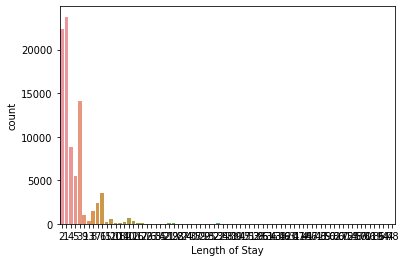

In [140]:
#check the distribution of LOS
ax = sns.countplot(x='Length of Stay',data=df)

In [141]:
#since there a sparse distribution after 15 days LOS, we dropped all the values which are smaller than 15
new = df['Length of Stay'].str.split(" ", n = 1, expand = True)
df.drop('Length of Stay',axis = 1, inplace=True)
df['length']=new[0]
df['length'].value_counts()

1      23767
2      22340
3      14042
4       8768
5       5476
6       3535
7       2367
8       1522
9       1023
10       692
11       496
12       362
13       280
14       226
15       181
16       116
17       109
18        81
20        58
21        57
19        49
22        44
23        32
26        30
24        29
25        23
30        20
27        17
28        17
29        10
       ...  
63         2
46         2
50         2
49         2
35         2
52         2
48         2
60         2
58         2
71         2
51         2
70         1
55         1
66         1
61         1
56         1
119        1
114        1
72         1
86         1
57         1
96         1
62         1
44         1
54         1
91         1
80         1
59         1
65         1
78         1
Name: length, Length: 75, dtype: int64

In [142]:
df['length'] = df['length'].astype(int)
df = df[df['length']<=15]
df['length'].value_counts()

1     23767
2     22340
3     14042
4      8768
5      5476
6      3535
7      2367
8      1522
9      1023
10      692
11      496
12      362
13      280
14      226
15      181
Name: length, dtype: int64

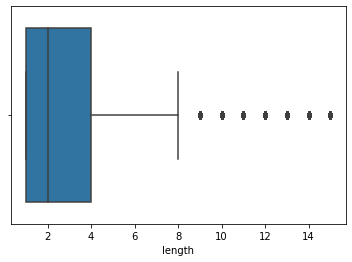

In [143]:

sns.boxplot(x=df['length'])

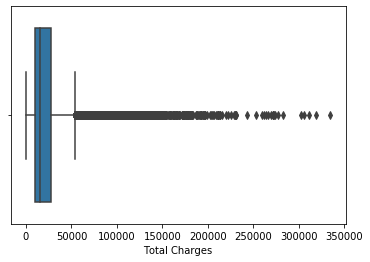

In [144]:
# check the distribution of total charges
sns.boxplot(x=df['Total Charges'])

In [145]:
#check the unique value of each column
df['Payment Typology 1'].value_counts()

Medicaid                     43434
Medicare                     20231
Private Health Insurance      9830
Blue Cross/Blue Shield        7946
Self-Pay                      2177
Managed Care, Unspecified      575
Federal/State/Local/VA         341
Miscellaneous/Other            250
Unknown                        163
Department of Corrections      130
Name: Payment Typology 1, dtype: int64

In [146]:
#select the data we interested in 
df = df.loc[df['Payment Typology 1'].isin(['Medicaid','Private Health Insurance','Blue Cross/Blue Shield','Medicare'])]
df['Payment Typology 1'].value_counts()

Medicaid                    43434
Medicare                    20231
Private Health Insurance     9830
Blue Cross/Blue Shield       7946
Name: Payment Typology 1, dtype: int64

In [147]:
#After data pre-process the data looks like:
df.head()

,Facility Name,Zip Code - 3 digits,Gender,Race,Ethnicity,Type of Admission,Discharge Year,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator,Total Charges,age,length
34,Cuba Memorial Hospital Inc,147,F,White,Not Span/Hispanic,Urgent,2014,1,Minor,Medical,Medicare,Y,3707.50,59.5,2
50,Cuba Memorial Hospital Inc,147,F,White,Not Span/Hispanic,Urgent,2014,1,Minor,Medical,Blue Cross/Blue Shield,Y,3363.25,59.5,2
64,Cuba Memorial Hospital Inc,147,M,White,Not Span/Hispanic,Elective,2014,1,Minor,Medical,Medicaid,Y,1564.90,8.5,1
235,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,148,F,White,Not Span/Hispanic,Emergency,2014,2,Major,Medical,Medicare,Y,8927.25,59.5,1
333,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,147,F,White,Not Span/Hispanic,Urgent,2014,2,Minor,Medical,Blue Cross/Blue Shield,N,11380.00,39.5,5


In [148]:
#output the data
df.to_csv(r"C:\Users\Naixin\Documents\AAE724\clean.csv',index = None, header=True)

SyntaxError: EOL while scanning string literal (<ipython-input-148-c6abca7f2776>, line 2)

# Data Visualization

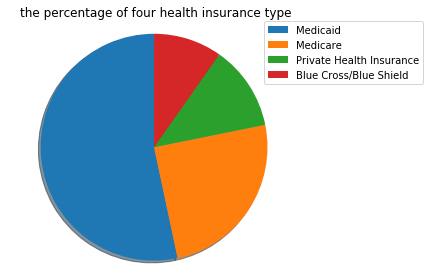

In [149]:
labels = ['Medicaid', 'Medicare', 'Private Health Insurance', 'Blue Cross/Blue Shield']
sizes = [43434, 20231, 9830, 7946]
patches, texts = plt.pie(sizes, shadow=True, startangle=90)
plt.legend(labels, bbox_to_anchor=(0.85,1.025), loc="upper left")
plt.axis('equal')
plt.title('the percentage of four health insurance type')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'the count distribution of race based on age group')

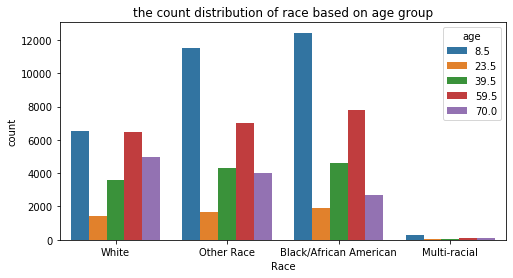

In [150]:
plt.figure(figsize=(8,4))
sns.countplot(x='Race',data=df,hue = 'age')
plt.title('the count distribution of race based on age group')

Text(0.5, 1.0, 'the count distribution of LOS')

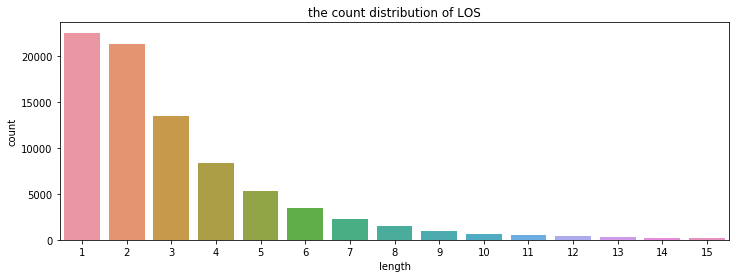

In [151]:
plt.figure(figsize=(12,4))
sns.countplot(df['length'])
plt.title('the count distribution of LOS')

Text(0.5, 1.0, 'the LOS for each insurance type')

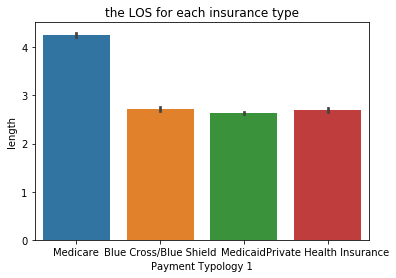

In [152]:
sns.barplot(x='Payment Typology 1',y='length',data=df)
plt.title('the LOS for each insurance type')

Text(0.5, 1.0, 'the relationship between age and LOS among different insurance type')

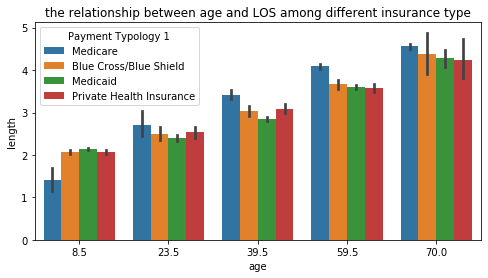

In [155]:
plt.figure(figsize=(8,4))
sns.barplot(x='age',y='length',hue = 'Payment Typology 1',data=df)
plt.title('the relationship between age and LOS among different insurance type')

Text(0.5, 1.0, 'the relationship between race and LOS among different insurance type')

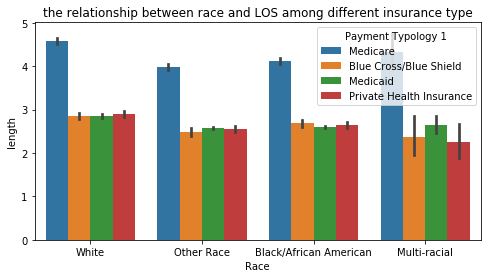

In [156]:
plt.figure(figsize=(8,4))
sns.barplot(x='Race',y='length',hue = 'Payment Typology 1',data=df)
plt.title('the relationship between race and LOS among different insurance type')

Text(0.5, 1.0, 'the relationship between Ethnicity and LOS among different insurance type')

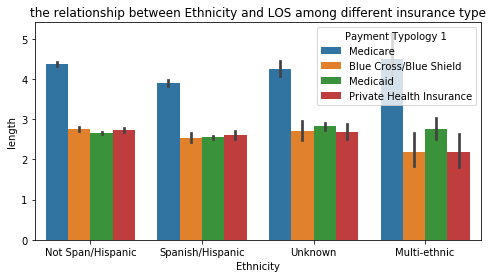

In [157]:
plt.figure(figsize=(8,4))
sns.barplot(x='Ethnicity',y='length',hue = 'Payment Typology 1',data=df)
plt.title('the relationship between Ethnicity and LOS among different insurance type')

Text(0.5, 1.0, 'the relationship between Gender and LOS among different insurance type')

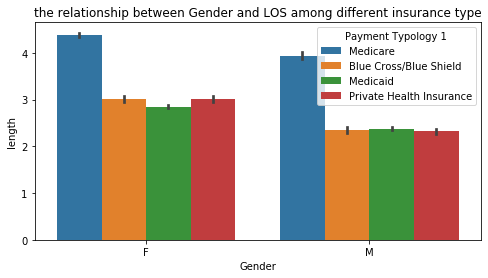

In [158]:
plt.figure(figsize=(8,4))
sns.barplot(x='Gender',y='length',hue = 'Payment Typology 1',data=df)
plt.title('the relationship between Gender and LOS among different insurance type')

Text(0.5, 1.0, 'the relationship between Gender and total charges among different discharge year')

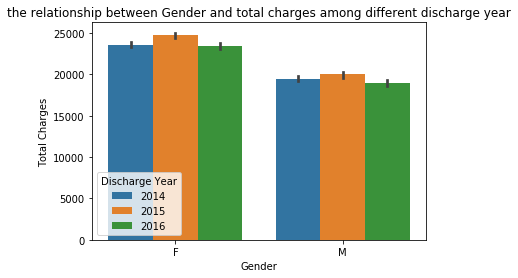

In [159]:
sns.barplot(x='Gender',y='Total Charges',hue = 'Discharge Year',data=df)
plt.title('the relationship between Gender and total charges among different discharge year')

Text(0.5, 1.0, 'the relationship between Type of Admission and LOS among different insurance type')

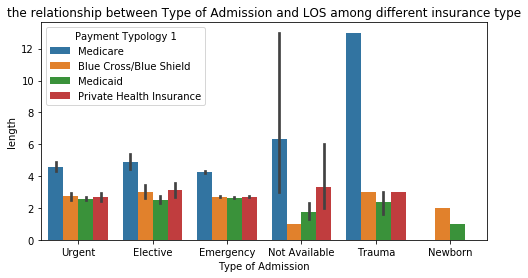

In [160]:
plt.figure(figsize=(8,4))
sns.barplot(x='Type of Admission',y='length',hue = 'Payment Typology 1',data=df)
plt.title('the relationship between Type of Admission and LOS among different insurance type')

Text(0.5, 1.0, 'the relationship between discharge year and LOS among different insurance type')

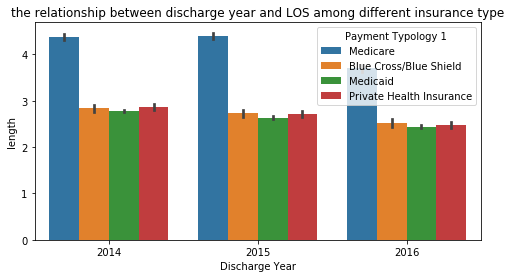

In [161]:
plt.figure(figsize=(8,4))
sns.barplot(x='Discharge Year',y='length',hue = 'Payment Typology 1',data=df)
plt.title('the relationship between discharge year and LOS among different insurance type')

Text(0.5, 1.0, 'the relationship between Discharge Year and LOS among different insurance type')

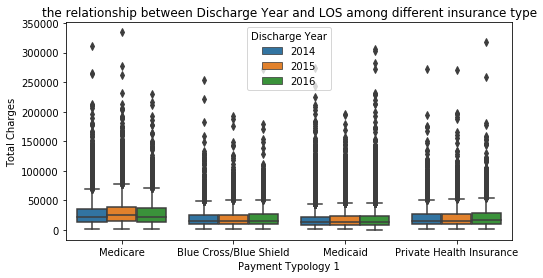

In [112]:
plt.figure(figsize=(8,4))
sns.boxplot(x="Payment Typology 1", y="Total Charges", data=df,hue = "Discharge Year")
plt.title('the relationship between Discharge Year and LOS among different insurance type')

Text(0.5, 1.0, 'the relationship between APR Medical Surgical Descriptionand LOS among different insurance type')

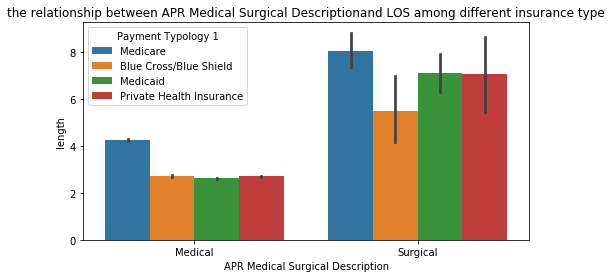

In [94]:
plt.figure(figsize=(8,4))
sns.barplot(x='APR Medical Surgical Description',y='length',hue = 'Payment Typology 1',data=df)
plt.title('the relationship between APR Medical Surgical Description and LOS among different insurance type')

Text(0.5, 1.0, 'the relationship between Severity of Illness and LOS among different insurance type')

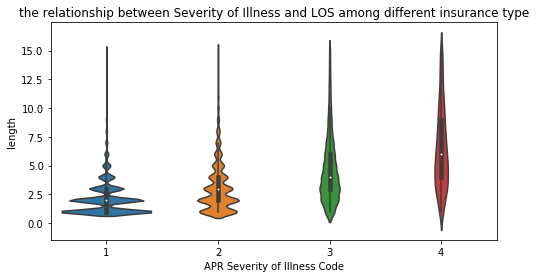

In [111]:
plt.figure(figsize=(8,4))
sns.violinplot(x="APR Severity of Illness Code", y="length", data=df)
plt.title('the relationship between Severity of Illness and LOS among different insurance type')

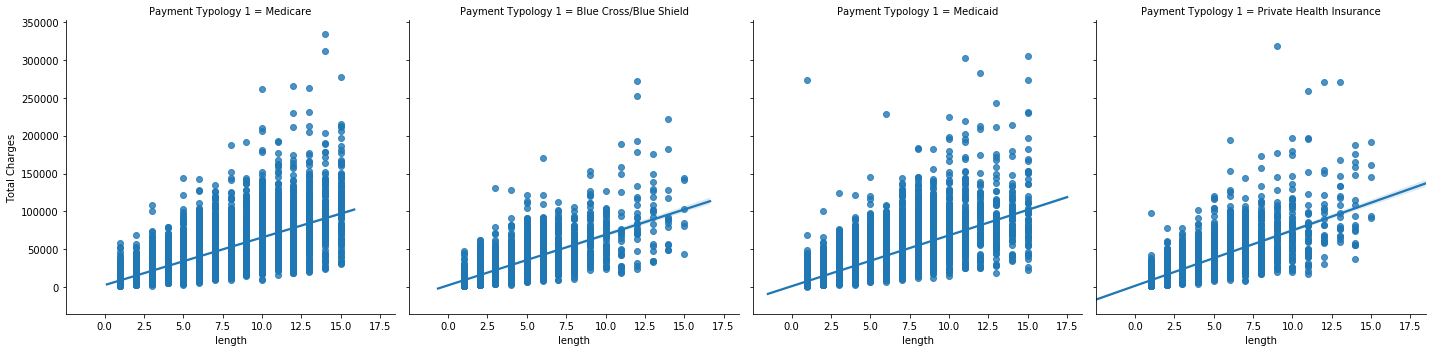

In [115]:
sns.lmplot(x='length',y='Total Charges',data=df,col='Payment Typology 1')

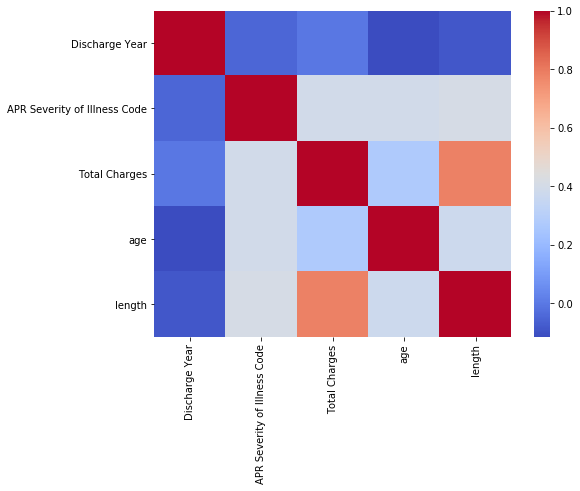

In [114]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='coolwarm')